In [ ]:
# Eextract periodic pattern from length sequence
from periodic_pattern_detector_down_top import *
from packet_length_extractor import *
from pathlib import Path

csv_file = "../dataset/scada/Modbus_polling_only_6RTU(106)_length_sequence.csv"

if Path(csv_file).exists():
    print("Extracting directed length sequence...")
    _, dir_len_sequence = read_sequence_from_csv(csv_file, "dir_len_con")
    min_len=10
    max_len=30
    sim_thresh=1.0
    jitter_ratio=0.3
    min_coverage_ratio=0.2
    pattern, match_times, avg_period, best_std_dev, best_coverage,covered_indices = detect_strict_periodic_pattern(dir_len_sequence, min_len, max_len, sim_thresh, jitter_ratio, min_coverage_ratio)
    # print('pattern: ', pattern)
    # print('match_times: ', match_times)
    # print('avg_period: ', avg_period)
    # print('best_std_dev: ', best_std_dev)
    # print('best_coverage: ', best_coverage)
    # print('covered_indices: ', covered_indices)

else:
    print("File does not exist")


Extracting directed length sequence...
Successfully read 9639 packets from ../dataset/scada/Modbus_polling_only_6RTU(106)_length_control_sequence.csv


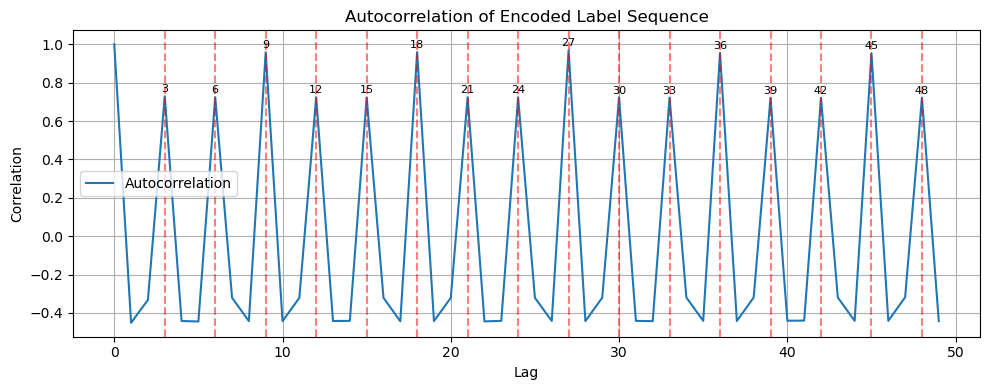

Period: 3, Time jitter too large: 5.084257115791215 > 2.785600330907974
Period: 6, Time jitter too large: 104.4814511647122 > 32.07541063371694
Period: 9, Time jitter too large: 4.898650014979638 > 1.7799965174198151
Period: 12, Not enough valid segments found: 6
Period: 15, Not enough valid segments found: 2
Period: 18, Time jitter too large: 4.779487646899752 > 3.3938880764503554
Period: 21, Not enough valid segments found: 0
Period: 24, Time jitter too large: 7.184220102209174 > 5.566069797149994
------------------------------
Current Period: 27
Current Segments Size: 355
Current Coverage Ratio: 0.9943977591036415
Current Similaritys Mean: 0.9677621283255086
Current Mean Interval: 10.028246691671468
Current Std Interval: 0.5328494002112694

******************************
New Best Period: 27
Period: 30, Time jitter too large: 6.423128273366112 > 6.188831038408346
Period: 33, Time jitter too large: 10.514208621120035 > 7.4683783839020546
------------------------------
Current Period: 

In [4]:
# Periodic pattern detector by ACF

from numpy import ma, maximum
from period_acf_number import *
from packet_length_extractor import *
from pathlib import Path

csv_file = "../dataset/scada/Modbus_polling_only_6RTU(106)_length_control_sequence.csv" 
# csv_file = "../dataset/swat/network/Dec2019_00000_20191206100500_00000w_filtered(192.168.1.10-192.168.1.200)_test_kept_app_length_control_sequence.csv"

if Path(csv_file).exists():
    print("Extracting directed length sequence...")
    _, dir_len_sequence = read_sequence_from_csv(csv_file, "dir_len")
    candidate_periods, autocorr = detect_period_via_autocorrelation(dir_len_sequence, max_lag=50, threshold=0.3)

    best_period = None
    best_segments = None
    best_coverage = 0
    best_similaritys_mean = 0
    best_mean_interval = 0
    best_std_interval = float('inf')
    for period, score in candidate_periods:
        # print(f"Candidate Period: {period}, Score: {score:.3f}")
        segments, similaritys_mean, coverage_ratio, mean_interval, std_interval = extract_periodic_segments(dir_len_sequence, period, min_segments=10, similarity_threshold=0.9, similarity_ratio=0.8, time_jitter_ratio=0.5, coverage_threshold=0.8)
        if segments:
            print("-"*30)
            print(f"Current Period: {period}")
            print(f"Current Segments Size: {len(segments)}")
            print(f"Current Coverage Ratio: {coverage_ratio}")
            print(f"Current Similaritys Mean: {similaritys_mean}")
            print(f"Current Mean Interval: {mean_interval}")
            print(f"Current Std Interval: {std_interval}")
            print("")
            if coverage_ratio > best_coverage*0.9 and similaritys_mean > best_similaritys_mean*0.9 and std_interval < best_std_interval*0.9:
                print("*"*30)
                print(f"New Best Period: {period}")
                best_segments = segments
                best_coverage = coverage_ratio
                best_similaritys_mean = similaritys_mean
                best_period = period
                best_mean_interval = mean_interval
                best_std_interval = std_interval
            # for idx, seg in segments:
                # print(f"  Repeated Segment at {idx}: {seg}")
                
    if best_segments:
        print(">"*30)
        print(f"Best Period: {best_period}")
        print(f"Best Segments Size: {len(best_segments)}")
        print(f"Best Coverage Ratio: {best_coverage:.5f}")
        print(f"Best Similaritys Mean: {best_similaritys_mean:.5f}")
        print(f"Best Mean Interval: {best_mean_interval}")
        print(f"Best Std Interval: {best_std_interval}")
        print(f"Best Segments:")
        for idx, seg in best_segments:
            print(f"  Repeated Segment at {idx}: {seg}")
        # for idx, seg in best_segments:
            # print(f"  Repeated Segment at {idx}: {seg}")
    else:
        print("No segments found")

In [1]:
# Periodic pattern detector by ACF_sequencematcher
from period_acf_others import *
from packet_length_extractor import *
from pathlib import Path

# csv_file = "../dataset/scada/Modbus_polling_only_6RTU(106)_length_control_sequence.csv" 
csv_file = "../dataset/swat/Dec2019_00000_20191206100500_00000w_filtered(192.168.1.10-192.168.1.200)_test_kept_length_control_sequence.csv"

if Path(csv_file).exists():
    print("Extracting directed length sequence...")
    _, dir_len_sequence = read_sequence_from_csv(csv_file, "dir_len")
    labels = [label for _, label in dir_len_sequence]
    acf_results = symbolic_autocorrelation(labels, min_lag=1, max_lag=50)
    print("Lag and similarity:")
    for lag, sim in acf_results:
        print(f"Lag={lag}, Similarity={sim:.3f}")
    plot_autocorrelation(acf_results)
else:
    print("File does not exist")

File does not exist
